Problem Statement:
Given data about COVID-19 patients, write code to visualize the impact and
analyze the trend of rate of infection and recovery as well as make predictions
about the number of cases expected a week in future based on the current
trends.


Dataset:
CSV and Excel files containing data about the number of COVID-19 confirmed
deaths and recovered patients both around the world and in India. Download Link

Guidelines:

● Use pandas to accumulate data from multiple data files.

● Use plotly (visualization library) to create interactive visualizations.

● Use Facebook prophet library to make time series models.

● Visualize the prediction by combining these technologies.

In [61]:
#import of libraries

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [63]:
#data import
df=pd.read_csv('covid_19_clean_complete.csv')

In [64]:
df.head()

Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa

In [65]:
#data preprocessing
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [113]:
df.rename(columns= {'Country/Region': 'Country', 'Province/State': 'State'}, inplace= True)

In [114]:
df['Date']= pd.to_datetime(df['Date'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


Converted date into datetime format

In [116]:
df.shape

(49068, 10)

In [256]:
df.describe(include='all')

State Country           Lat          Long  \
count                          14664   49068  49068.000000  49068.000000   
unique                            78     187           NaN           NaN   
top     Australian Capital Territory   China           NaN           NaN   
freq                             188    6204           NaN           NaN   
first                            NaN     NaN           NaN           NaN   
last                             NaN     NaN           NaN           NaN   
mean                             NaN     NaN     21.433730     23.528236   
std                              NaN     NaN     24.950320     70.442740   
min                              NaN     NaN    -51.796300   -135.000000   
25%                              NaN     NaN      7.873054    -15.310100   
50%                              NaN     NaN     23.634500     21.745300   
75%                              NaN     NaN     41.204380     80.771797   
max                              NaN     NaN     71.706900    178.065000   

                       Date     Confirmed         Deaths     Recovered  \
count                 49068  4.906800e+04   49068.000000  4.906800e+04   
unique                  188           NaN            NaN           NaN   
top     2020-01-22 00:00:00           NaN            NaN           NaN   
freq                    261           NaN            NaN           NaN   
first   2020-01-22 00:00:00           NaN            NaN           NaN   
last    2020-07-27 00:00:00           NaN            NaN           NaN   
mean                    NaN  1.688490e+04     884.179160  7.915713e+03   
std                     NaN  1.273002e+05    6313.584411  5.480092e+04   
min                     NaN  0.000000e+00       0.000000  0.000000e+00   
25%                     NaN  4.000000e+00       0.000000  0.000000e+00   
50%                     NaN  1.680000e+02       2.000000  2.900000e+01   
75%                     NaN  1.518250e+03      30.000000  6.660000e+02   
max                     NaN  4.290259e+06  148011.000000  1.846641e+06   

              Active WHO Region  
count   4.906800e+04      49068  
unique           NaN          6  
top              NaN     Europe  
freq             NaN      15040  
first            NaN        NaN  
last             NaN        NaN  
mean    8.085012e+03        NaN  
std     7.625890e+04        NaN  
min    -1.400000e+01        NaN  
25%     0.000000e+00        NaN  
50%     2.600000e+01        NaN  
75%     6.060000e+02        NaN  
max     2.816444e+06        NaN

In [117]:
#feature engineering

In [118]:
#finding out the latest date for recent data statistics and all EDA part is done using latest date data

In [119]:
latest= df[df['Date']==df['Date'].max()]
latest

State                Country        Lat       Long       Date  \
48807   NaN            Afghanistan  33.939110  67.709953 2020-07-27   
48808   NaN                Albania  41.153300  20.168300 2020-07-27   
48809   NaN                Algeria  28.033900   1.659600 2020-07-27   
48810   NaN                Andorra  42.506300   1.521800 2020-07-27   
48811   NaN                 Angola -11.202700  17.873900 2020-07-27   
...     ...                    ...        ...        ...        ...   
49063   NaN  Sao Tome and Principe   0.186400   6.613100 2020-07-27   
49064   NaN                  Yemen  15.552727  48.516388 2020-07-27   
49065   NaN                Comoros -11.645500  43.333300 2020-07-27   
49066   NaN             Tajikistan  38.861000  71.276100 2020-07-27   
49067   NaN                Lesotho -29.610000  28.233600 2020-07-27   

       Confirmed  Deaths  Recovered  Active             WHO Region  
48807      36263    1269      25198    9796  Eastern Mediterranean  
48808       4880     144       2745    1991                 Europe  
48809      27973    1163      18837    7973                 Africa  
48810        907      52        803      52                 Europe  
48811        950      41        242     667                 Africa  
...          ...     ...        ...     ...                    ...  
49063        865      14        734     117                 Africa  
49064       1691     483        833     375  Eastern Mediterranean  
49065        354       7        328      19                 Africa  
49066       7235      60       6028    1147                 Europe  
49067        505      12        128     365                 Africa  

[261 rows x 10 columns]

It can be stated that the forecast will be made based on the latest collected data for the next week 

In [383]:
top_cases= latest.groupby(by='Country')['Confirmed','Deaths', 'Recovered','Active', 'Date'].sum().reset_index()
top_cases.head(25)

Country  Confirmed  Deaths  Recovered  Active
0              Afghanistan      36263    1269      25198    9796
1                  Albania       4880     144       2745    1991
2                  Algeria      27973    1163      18837    7973
3                  Andorra        907      52        803      52
4                   Angola        950      41        242     667
5      Antigua and Barbuda         86       3         65      18
6                Argentina     167416    3059      72575   91782
7                  Armenia      37390     711      26665   10014
8                Australia      15303     167       9311    5825
9                  Austria      20558     713      18246    1599
10              Azerbaijan      30446     423      23242    6781
11                 Bahamas        382      11         91     280
12                 Bahrain      39482     141      36110    3231
13              Bangladesh     226225    2965     125683   97577
14                Barbados        110       7         94       9
15                 Belarus      67251     538      60492    6221
16                 Belgium      66428    9822      17452   39154
17                  Belize         48       2         26      20
18                   Benin       1770      35       1036     699
19                  Bhutan         99       0         86      13
20                 Bolivia      71181    2647      21478   47056
21  Bosnia and Herzegovina      10498     294       4930    5274
22                Botswana        739       2         63     674
23                  Brazil    2442375   87618    1846641  508116
24                  Brunei        141       3        138       0

In [ ]:
#finding out data for confirmed cases 

In [133]:
confirmed= df.groupby('Date')['Confirmed'].sum().reset_index()

In [161]:
confirmed

Date  Confirmed
0   2020-01-22        555
1   2020-01-23        654
2   2020-01-24        941
3   2020-01-25       1434
4   2020-01-26       2118
..         ...        ...
183 2020-07-23   15510481
184 2020-07-24   15791645
185 2020-07-25   16047190
186 2020-07-26   16251796
187 2020-07-27   16480485

[188 rows x 2 columns]

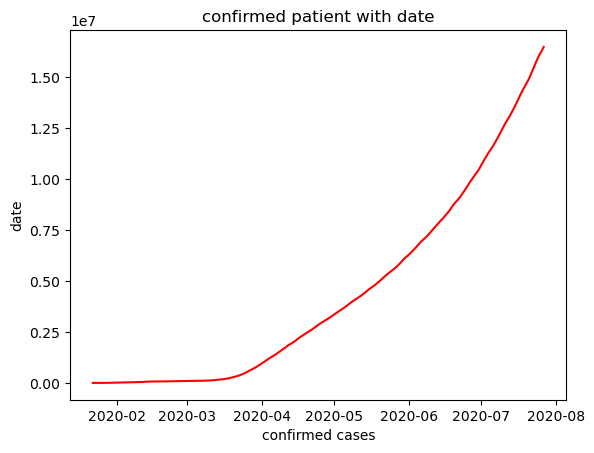

In [176]:
#Visualisation 
sns.lineplot(x=confirmed['Date'], y= confirmed['Confirmed'], color='red')
plt.xlabel('confirmed cases')
plt.ylabel('date')
plt.title('confirmed patient with date')
plt.show()

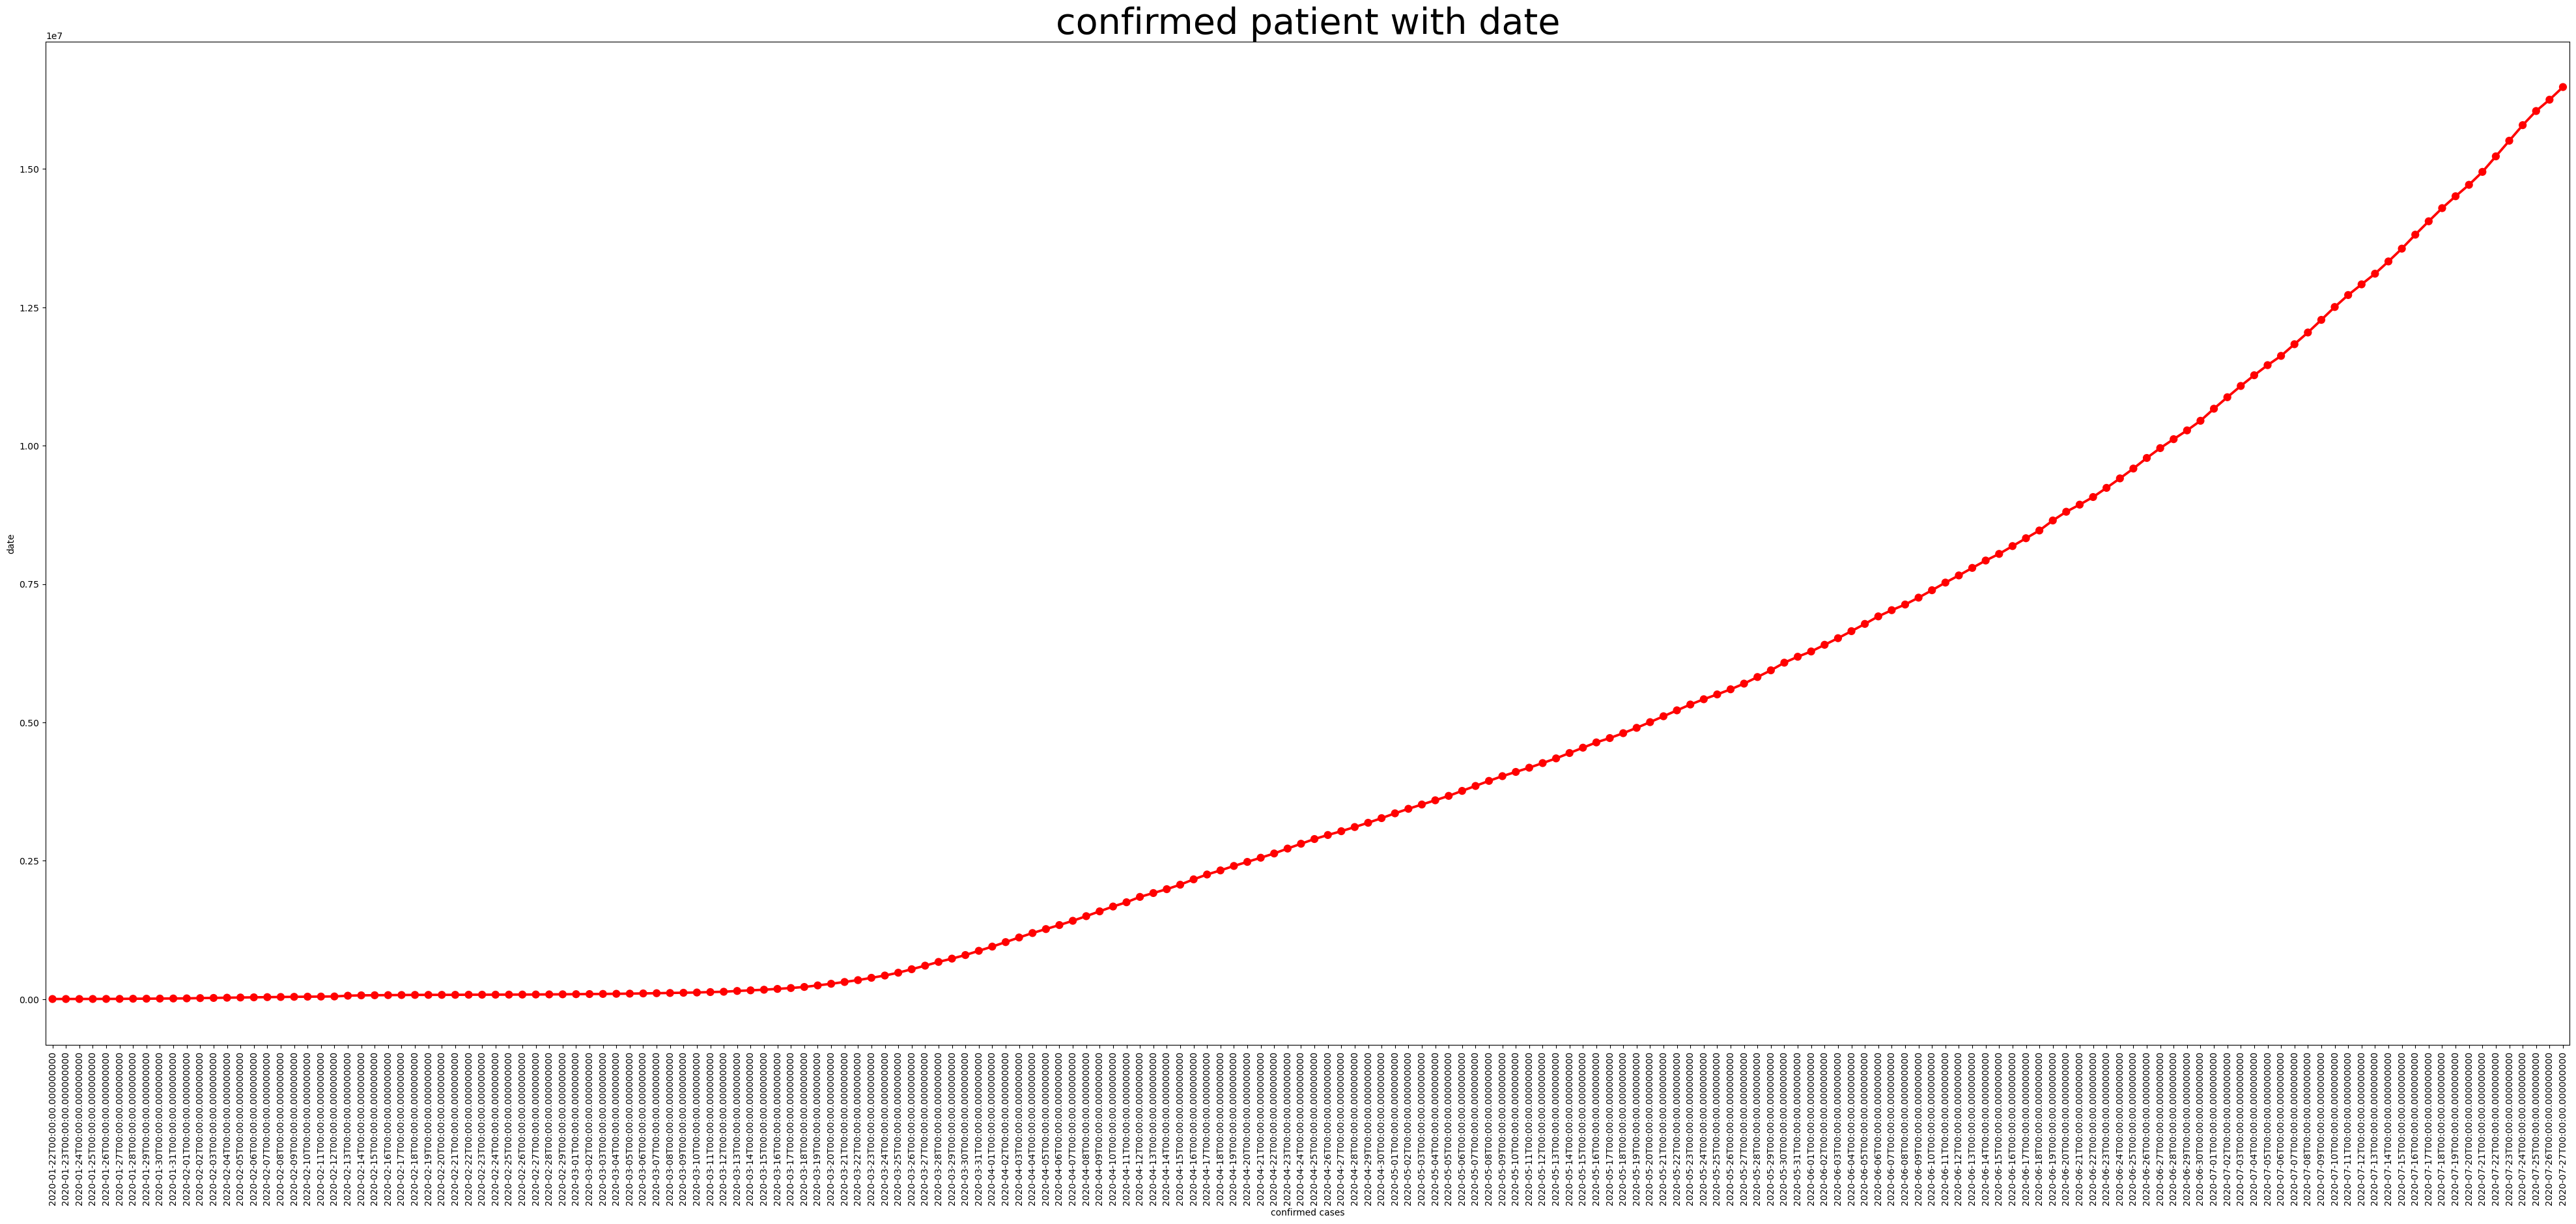

In [248]:
plt.figure(figsize= (50,20))
sns.pointplot(x=confirmed['Date'], y= confirmed['Confirmed'], color='red')
plt.xlabel('confirmed cases')
plt.ylabel('date')
plt.xticks(rotation=90)
plt.title('confirmed patient with date',fontsize=40)
plt.show()

In [178]:
#finding out data for confirmed cases 
recovered= df.groupby('Date')['Recovered'].sum().reset_index()
recovered

Date  Recovered
0   2020-01-22         28
1   2020-01-23         30
2   2020-01-24         36
3   2020-01-25         39
4   2020-01-26         52
..         ...        ...
183 2020-07-23    8710969
184 2020-07-24    8939705
185 2020-07-25    9158743
186 2020-07-26    9293464
187 2020-07-27    9468087

[188 rows x 2 columns]

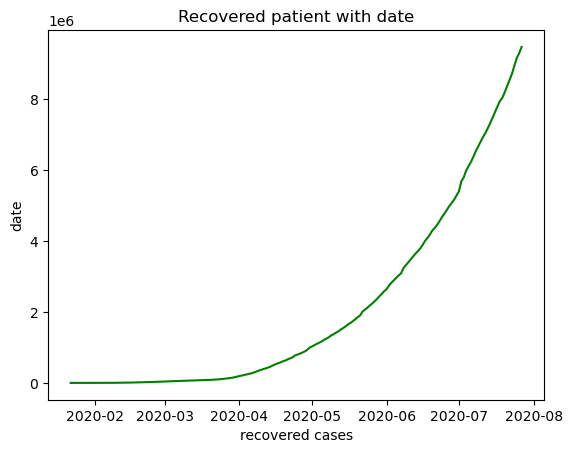

In [182]:
#Visualisation 
sns.lineplot(x=recovered['Date'], y= recovered['Recovered'], color='green')
plt.xlabel('recovered cases')
plt.ylabel('date')
plt.title('Recovered patient with date')
plt.show()

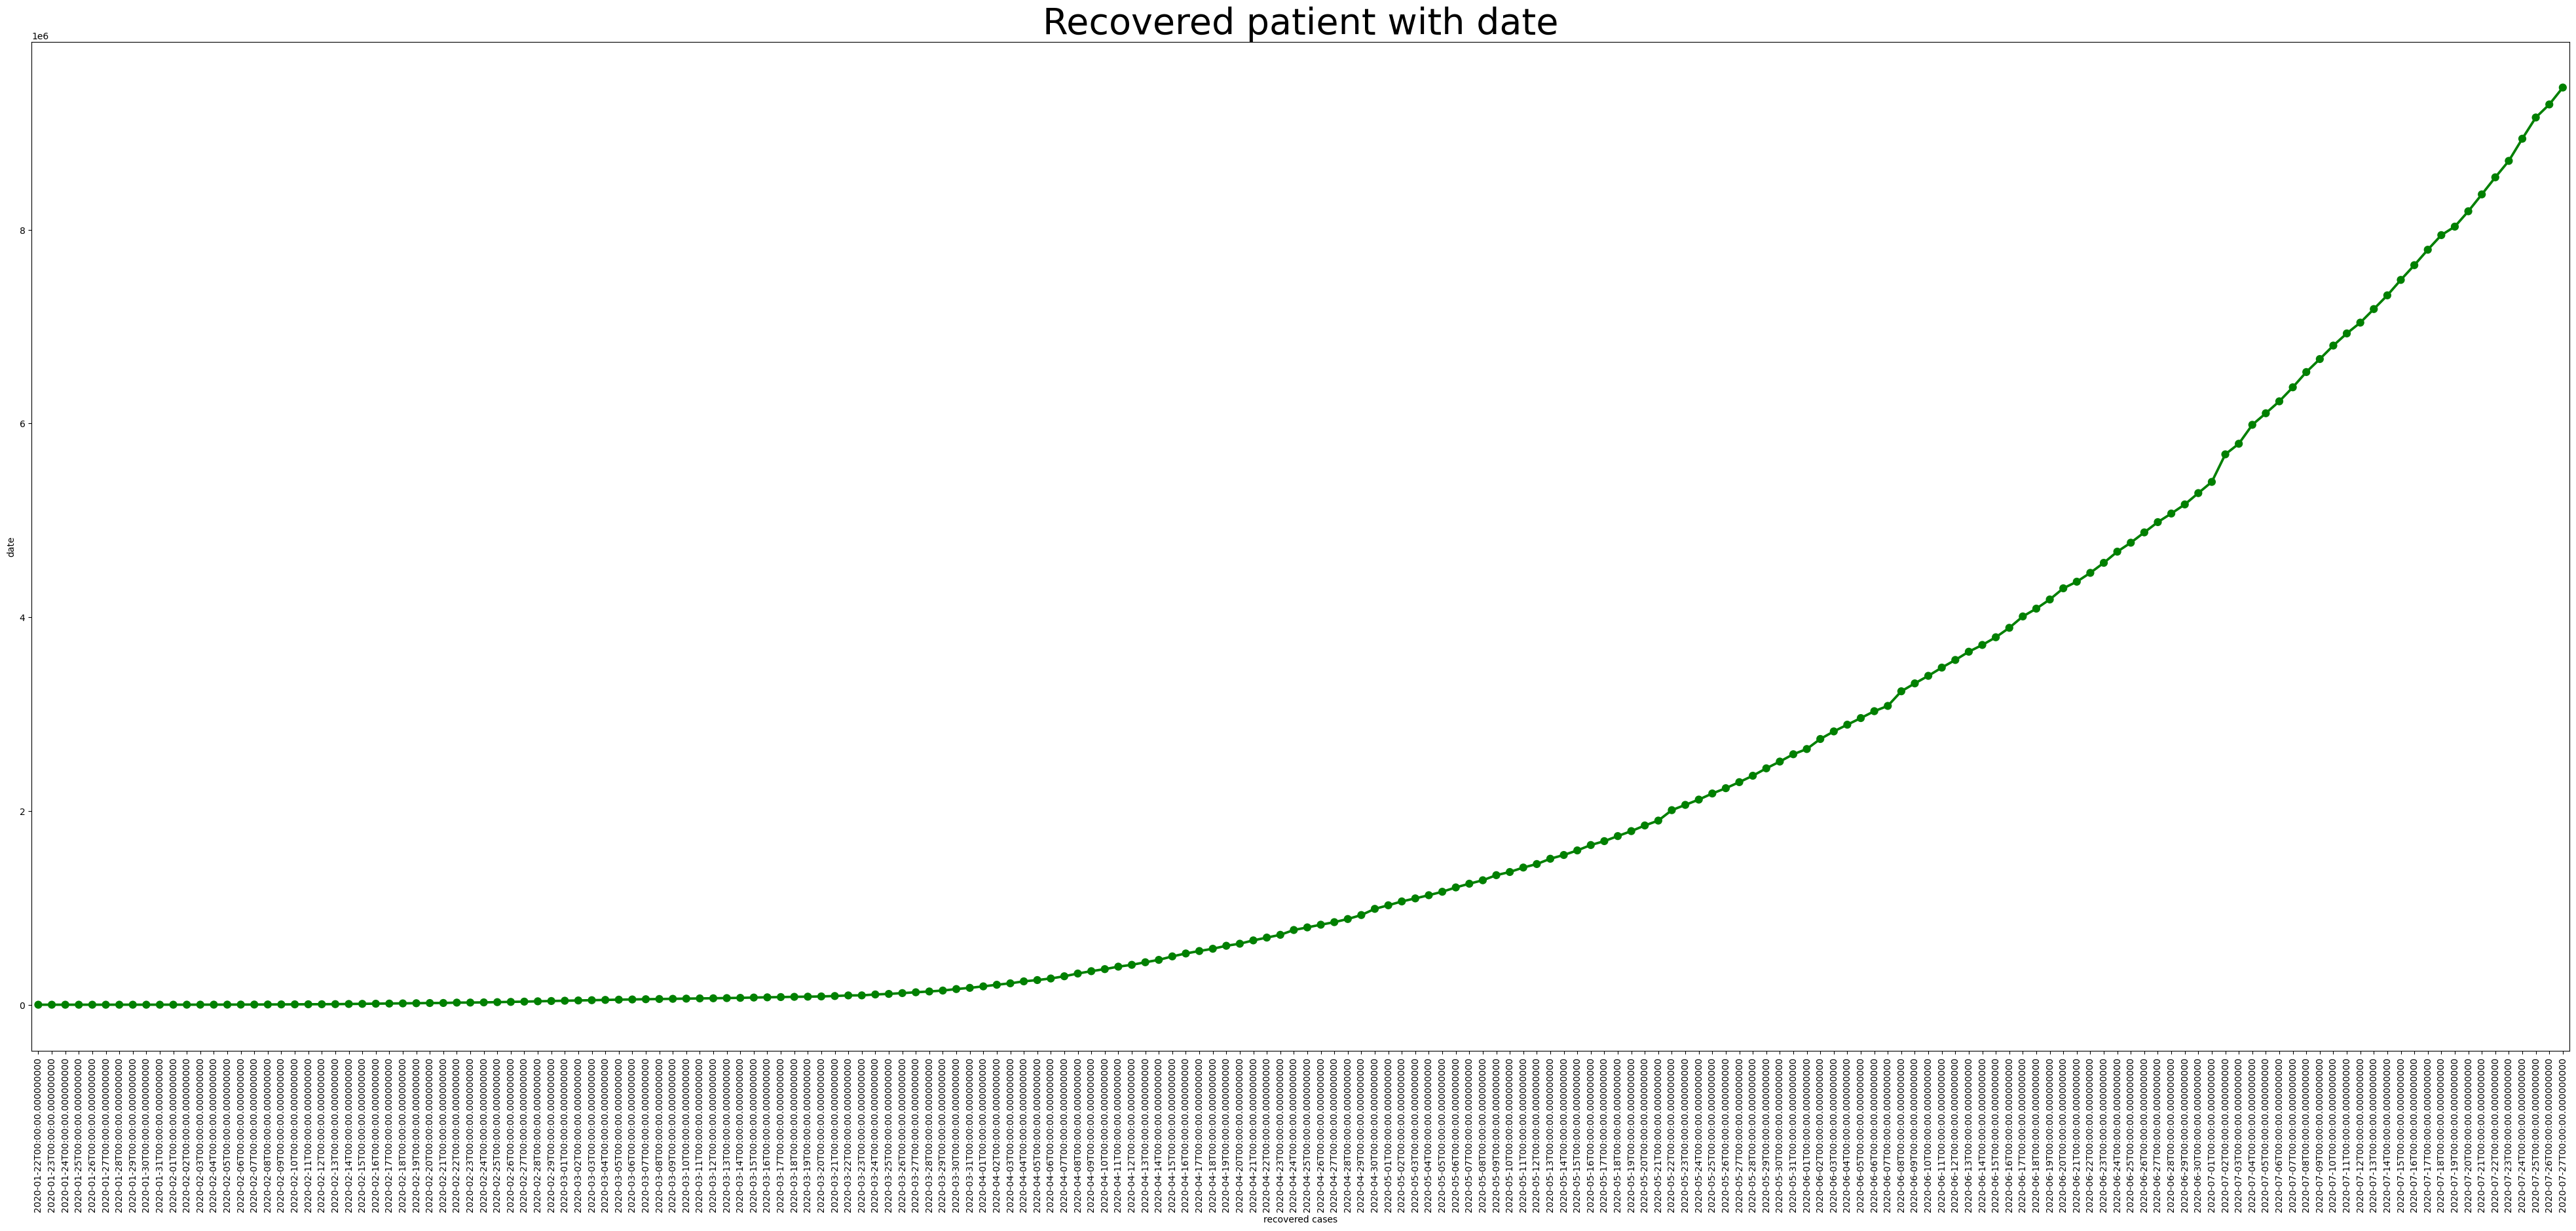

In [246]:
plt.figure(figsize= (50,20))
sns.pointplot(x=recovered['Date'], y= recovered['Recovered'], color='green')
plt.xlabel('recovered cases')
plt.ylabel('date')
plt.xticks(rotation=90)
plt.title('Recovered patient with date',fontsize=40)
plt.show()

In [184]:
#visualisation using plotly

import plotly 
import plotly.express as px

In [369]:
figure = px.choropleth(top_cases,locations="Country",
                       locationmode = "country names", color="Active",
                       hover_name="Country",range_color=[1,20000],
                       color_continuous_scale="reds",
                       title="Countries with Active Cases")
figure.show()


In [370]:
figure = px.choropleth(top_cases,locations="Country",
                       locationmode = "country names", color="Recovered",
                       hover_name="Country",range_color=[1,20000],
                       color_continuous_scale="reds",
                       title="Countries with Recovered Cases")
figure.show()


In [371]:
figure = px.choropleth(top_cases,locations="Country",
                       locationmode = "country names", color="Confirmed",
                       hover_name="Country",range_color=[1,20000],
                       color_continuous_scale="reds",
                       title="Countries with Confirmed Cases")
figure.show()

In [372]:
figure = px.choropleth(top_cases,locations="Country",
                       locationmode = "country names", color="Deaths",
                       hover_name="Country",range_color=[1,20000],
                       color_continuous_scale="reds",
                       title="Countries with Deaths Cases")
figure.show()

Based on the given map, it can be evaluted that there are higher rate of confirmed cases in America, african countries along with china.

In case of death cases, northa america and canada seems to have higher rate compared to other countries across the world.

Based on the given map, it can be evaluted that there are higher rate of recovered cases in America, south africa and china.


In [ ]:
#top country recovered, confirmed, active and death cases 

In [233]:
top_10_Recovered=top_cases.groupby('Country')['Recovered'].sum().sort_values(ascending= False).head(10).reset_index()
top_10_Recovered

Country  Recovered
0        Brazil    1846641
1            US    1325804
2         India     951166
3        Russia     602249
4         Chile     319954
5        Mexico     303810
6  South Africa     274925
7          Peru     272547
8          Iran     255144
9      Pakistan     241026

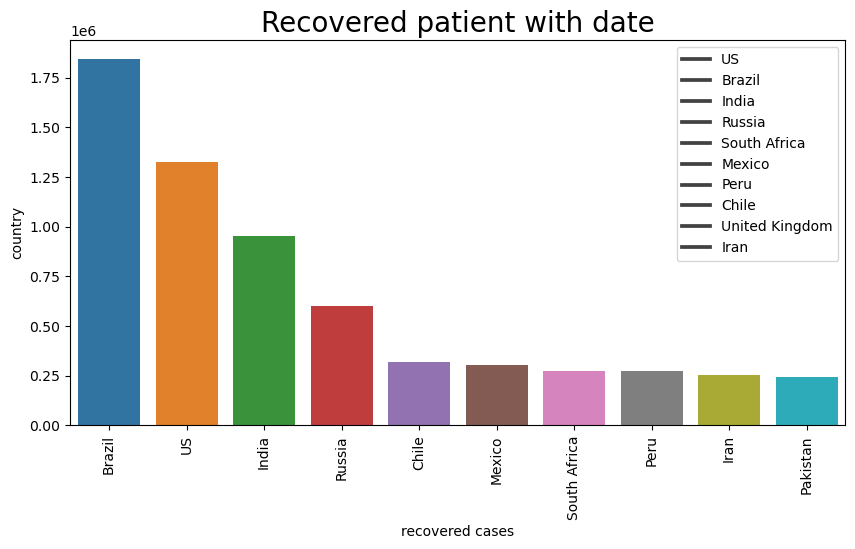

In [244]:
plt.figure(figsize= (10,5))
sns.barplot(x=top_10_Recovered['Country'], y=top_10_Recovered['Recovered'])
plt.xlabel('recovered cases')
plt.ylabel('country')
plt.xticks(rotation=90)
plt.legend(top_10_Confirmed['Country'])
plt.title('Recovered patient with date',fontsize=20)
plt.show()

In [236]:
top_10_Confirmed=top_cases.groupby('Country')['Confirmed'].sum().sort_values(ascending= False).head(10).reset_index()
top_10_Confirmed

Country  Confirmed
0              US    4290259
1          Brazil    2442375
2           India    1480073
3          Russia     816680
4    South Africa     452529
5          Mexico     395489
6            Peru     389717
7           Chile     347923
8  United Kingdom     301708
9            Iran     293606

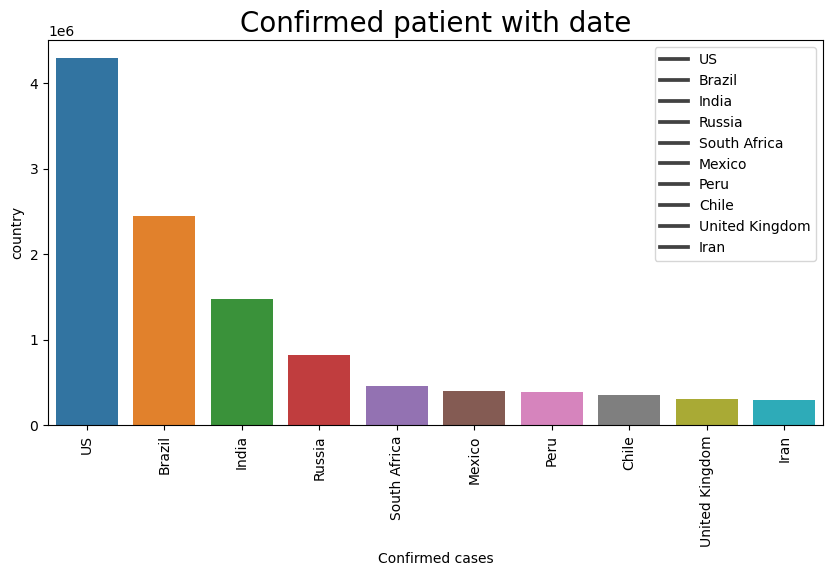

In [250]:
plt.figure(figsize= (10,5))
sns.barplot(x=top_10_Confirmed['Country'], y=top_10_Confirmed['Confirmed'])
plt.xlabel('Confirmed cases')
plt.ylabel('country')
plt.xticks(rotation=90)
plt.legend(top_10_Confirmed['Country'])
plt.title('Confirmed patient with date',fontsize=20)
plt.show()

In [239]:
top_10_Deaths=top_cases.groupby('Country')['Deaths'].sum().sort_values(ascending= False).head(10).reset_index()
top_10_Deaths

Country  Deaths
0              US  148011
1          Brazil   87618
2  United Kingdom   45844
3          Mexico   44022
4           Italy   35112
5           India   33408
6          France   30212
7           Spain   28432
8            Peru   18418
9            Iran   15912

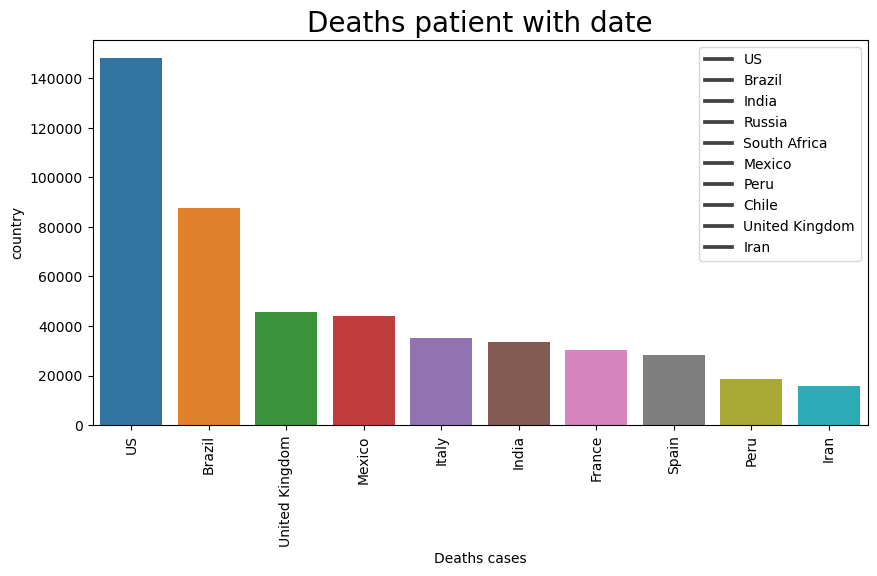

In [251]:
plt.figure(figsize= (10,5))
sns.barplot(x=top_10_Deaths['Country'], y=top_10_Deaths['Deaths'])
plt.xlabel('Deaths cases')
plt.ylabel('country')
plt.xticks(rotation=90)
plt.legend(top_10_Confirmed['Country'])
plt.title('Deaths patient with date',fontsize=20)
plt.show()

In [241]:
top_10_Active=top_cases.groupby('Country')['Active'].sum().sort_values(ascending= False).head(10).reset_index()
top_10_Active

Country   Active
0              US  2816444
1          Brazil   508116
2           India   495499
3  United Kingdom   254427
4          Russia   201097
5    South Africa   170537
6        Colombia   117163
7          France   108928
8          Canada   107514
9            Peru    98752

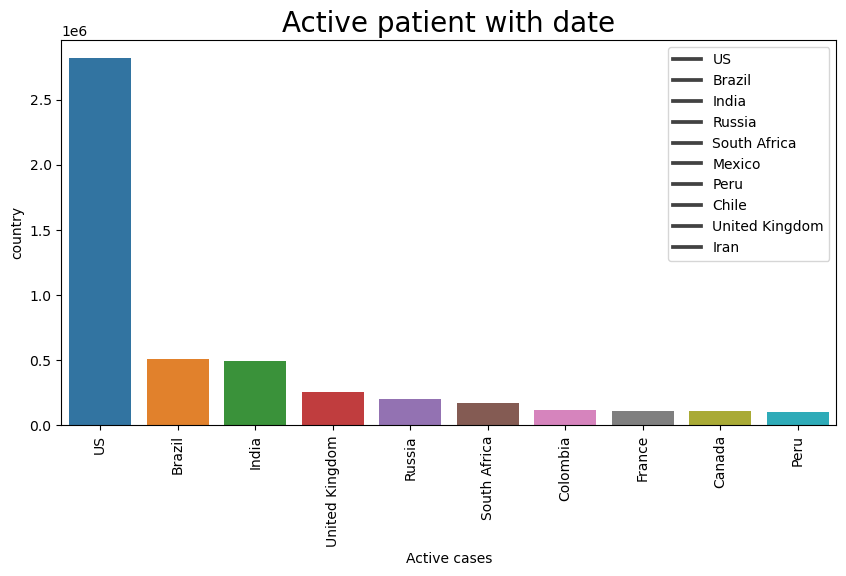

In [252]:
plt.figure(figsize= (10,5))
sns.barplot(x=top_10_Active['Country'], y=top_10_Active['Active'])
plt.xlabel('Active cases')
plt.ylabel('country')
plt.xticks(rotation=90)
plt.legend(top_10_Confirmed['Country'])
plt.title('Active patient with date',fontsize=20)
plt.show()

In [ ]:
#Comparing all cases for different countries 

In [262]:
india= df.loc[df['Country']=='India']
india.groupby('Date')['Confirmed','Deaths', 'Recovered','Active'].sum().reset_index()

Date  Confirmed  Deaths  Recovered  Active
0   2020-01-22          0       0          0       0
1   2020-01-23          0       0          0       0
2   2020-01-24          0       0          0       0
3   2020-01-25          0       0          0       0
4   2020-01-26          0       0          0       0
..         ...        ...     ...        ...     ...
183 2020-07-23    1288108   30601     817209  440298
184 2020-07-24    1337024   31358     849432  456234
185 2020-07-25    1385635   32060     885573  468002
186 2020-07-26    1435616   32771     917568  485277
187 2020-07-27    1480073   33408     951166  495499

[188 rows x 5 columns]

In [265]:
us= df.loc[df['Country']=='US']
us.groupby('Date')['Confirmed','Deaths', 'Recovered','Active'].sum().reset_index()

Date  Confirmed  Deaths  Recovered   Active
0   2020-01-22          1       0          0        1
1   2020-01-23          1       0          0        1
2   2020-01-24          2       0          0        2
3   2020-01-25          2       0          0        2
4   2020-01-26          5       0          0        5
..         ...        ...     ...        ...      ...
183 2020-07-23    4038816  144430    1233269  2661117
184 2020-07-24    4112531  145560    1261624  2705347
185 2020-07-25    4178970  146465    1279414  2753091
186 2020-07-26    4233923  146935    1297863  2789125
187 2020-07-27    4290259  148011    1325804  2816444

[188 rows x 5 columns]

In [266]:
china= df.loc[df['Country']=='China']
china.groupby('Date')['Confirmed','Deaths', 'Recovered','Active'].sum().reset_index()

Date  Confirmed  Deaths  Recovered  Active
0   2020-01-22        548      17         28     503
1   2020-01-23        643      18         30     595
2   2020-01-24        920      26         36     858
3   2020-01-25       1406      42         39    1325
4   2020-01-26       2075      56         49    1970
..         ...        ...     ...        ...     ...
183 2020-07-23      86045    4649      78701    2695
184 2020-07-24      86202    4650      78745    2807
185 2020-07-25      86381    4652      78813    2916
186 2020-07-26      86570    4652      78862    3056
187 2020-07-27      86783    4656      78869    3258

[188 rows x 5 columns]

In [ ]:
#active cases of these countries

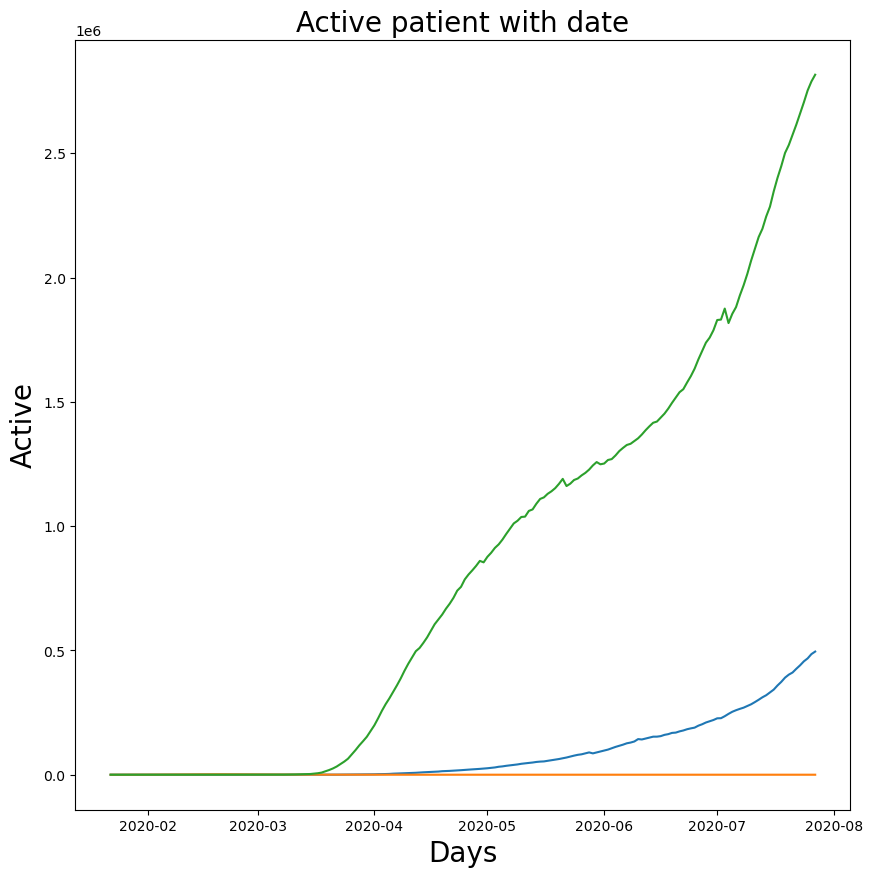

In [273]:
plt.figure(figsize=(10,10))
sns.lineplot(x=india['Date'], y= india['Active'])
sns.lineplot(x=china['Date'], y= china['Active'])
sns.lineplot(x=us['Date'], y= us['Active'])
plt.xlabel('Days',fontsize=20)
plt.ylabel('Active',fontsize=20)
plt.title('Active patient with date',fontsize=20)
plt.show()

In [ ]:
#recovered cases of these countries

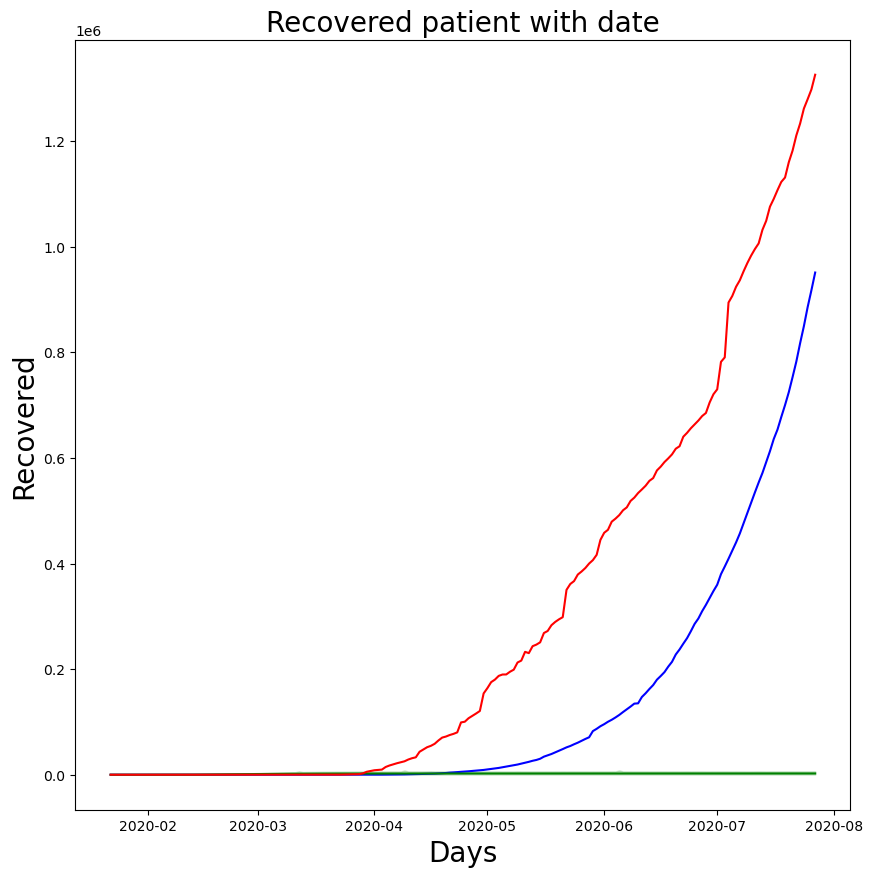

In [275]:
plt.figure(figsize=(10,10))
sns.lineplot(x=india['Date'], y= india['Recovered'], color= 'blue')
sns.lineplot(x=china['Date'], y= china['Recovered'], color= 'green')
sns.lineplot(x=us['Date'], y= us['Recovered'], color= 'red')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Recovered',fontsize=20)
plt.title('Recovered patient with date',fontsize=20)
plt.show()

In [ ]:
##death cases of these countries

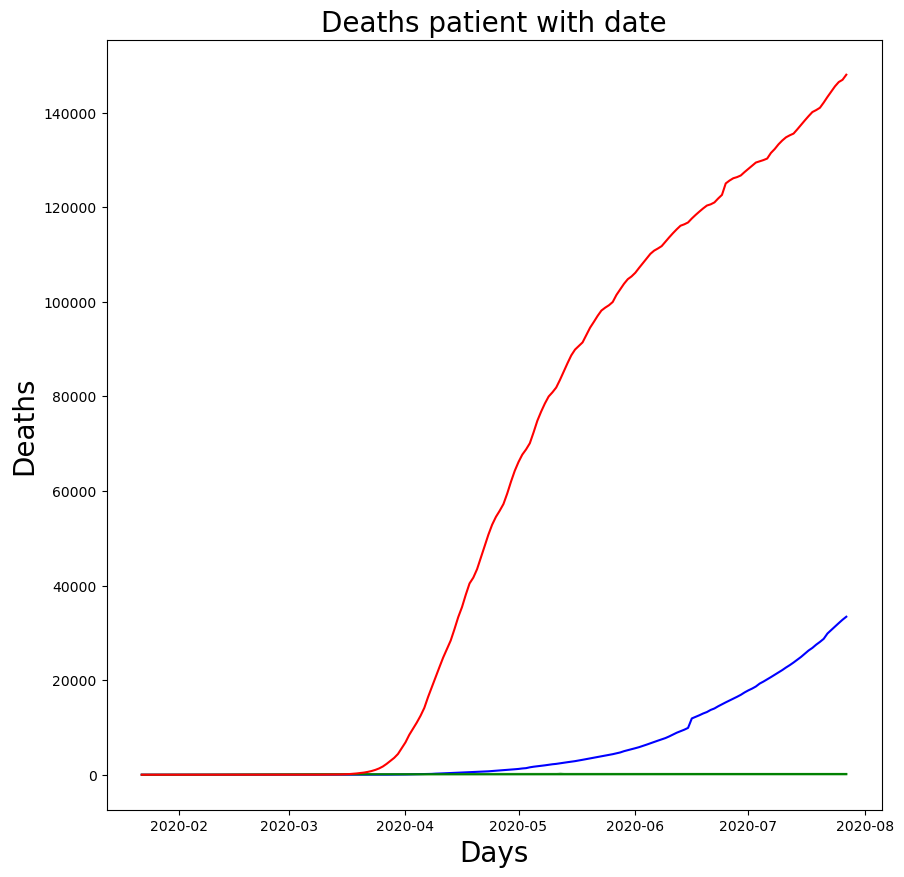

In [276]:
plt.figure(figsize=(10,10))
sns.lineplot(x=india['Date'], y= india['Deaths'], color= 'blue')
sns.lineplot(x=china['Date'], y= china['Deaths'], color= 'green')
sns.lineplot(x=us['Date'], y= us['Deaths'], color= 'red')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Deaths',fontsize=20)
plt.title('Deaths patient with date',fontsize=20)
plt.show()

In [ ]:
#confirmed cases of these countries

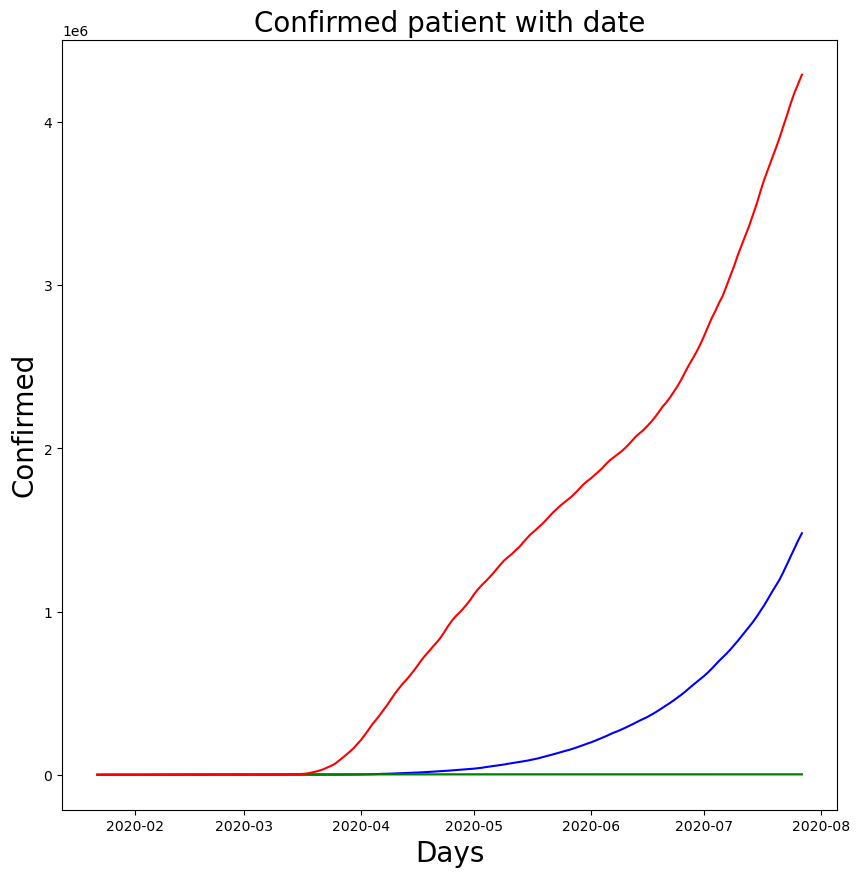

In [277]:
plt.figure(figsize=(10,10))
sns.lineplot(x=india['Date'], y= india['Confirmed'], color= 'blue')
sns.lineplot(x=china['Date'], y= china['Confirmed'], color= 'green')
sns.lineplot(x=us['Date'], y= us['Confirmed'], color= 'red')
plt.xlabel('Days',fontsize=20)
plt.ylabel('Confirmed',fontsize=20)
plt.title('Confirmed patient with date',fontsize=20)
plt.show()

In [ ]:
#Use Facebook prophet library to make time series models.

In [253]:
!pip install prophet

     ---------------------------------------- 13.3/13.3 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 854.3/854.3 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 93.0/93.0 kB 5.2 MB/s eta 0:00:00


In [ ]:
#making column based on prophet to fit the data

In [279]:
df.head()

State      Country       Lat       Long       Date  Confirmed  Deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   Recovered  Active             WHO Region  
0          0       0  Eastern Mediterranean  
1          0       0                 Europe  
2          0       0                 Africa  
3          0       0                 Europe  
4          0       0                 Africa

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   State       14664 non-null  object        
 1   Country     49068 non-null  object        
 2   Lat         49068 non-null  float64       
 3   Long        49068 non-null  float64       
 4   Date        49068 non-null  datetime64[ns]
 5   Confirmed   49068 non-null  int64         
 6   Deaths      49068 non-null  int64         
 7   Recovered   49068 non-null  int64         
 8   Active      49068 non-null  int64         
 9   WHO Region  49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
#feature selection

In [308]:
confirmed_data= df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed_data.columns= ['ds', 'y']

In [309]:
confirmed_data

ds         y
0   2020-01-22       555
1   2020-01-23       654
2   2020-01-24       941
3   2020-01-25      1434
4   2020-01-26      2118
..         ...       ...
183 2020-07-23  15510481
184 2020-07-24  15791645
185 2020-07-25  16047190
186 2020-07-26  16251796
187 2020-07-27  16480485

[188 rows x 2 columns]

In [ ]:
#making forecast for confirmed cases

In [290]:
from prophet import Prophet

In [321]:
#model implementation with CI 95%
m= Prophet(interval_width=0.95)

In [322]:
m.fit(confirmed_data)

01:41:23 - cmdstanpy - INFO - Chain [1] start processing
01:41:24 - cmdstanpy - INFO - Chain [1] done processing


In [329]:
#frequency in days
future =m.make_future_dataframe(periods=7,freq='D')


In [330]:
future.head()

ds
0 2020-01-22
1 2020-01-23
2 2020-01-24
3 2020-01-25
4 2020-01-26

In [331]:
#$model forcast
forcast = m.predict(future)

In [332]:
forcast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -9.356186e+03 -1.767150e+05  1.406706e+05 -9.356186e+03   
1   2020-01-23 -6.667734e+03 -1.617655e+05  1.463086e+05 -6.667734e+03   
2   2020-01-24 -3.979282e+03 -1.544934e+05  1.556872e+05 -3.979282e+03   
3   2020-01-25 -1.290830e+03 -1.478410e+05  1.633639e+05 -1.290830e+03   
4   2020-01-26  1.397622e+03 -1.366025e+05  1.626367e+05  1.397622e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  1.674928e+07  1.658665e+07  1.690318e+07  1.672136e+07   
191 2020-07-31  1.695352e+07  1.681001e+07  1.713871e+07  1.690682e+07   
192 2020-08-01  1.715776e+07  1.699474e+07  1.733331e+07  1.709316e+07   
193 2020-08-02  1.736200e+07  1.718123e+07  1.754929e+07  1.728101e+07   
194 2020-08-03  1.756624e+07  1.738804e+07  1.775553e+07  1.747053e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -9.356186e+03   -10986.210444         -10986.210444         -10986.210444   
1   -6.667734e+03    -1078.891654          -1078.891654          -1078.891654   
2   -3.979282e+03    10103.249373          10103.249373          10103.249373   
3   -1.290830e+03    13670.214198          13670.214198          13670.214198   
4    1.397622e+03     7218.144397           7218.144397           7218.144397   
..            ...             ...                   ...                   ...   
190  1.677711e+07    -1078.891654          -1078.891654          -1078.891654   
191  1.700060e+07    10103.249373          10103.249373          10103.249373   
192  1.722532e+07    13670.214198          13670.214198          13670.214198   
193  1.745588e+07     7218.144397           7218.144397           7218.144397   
194  1.768367e+07    -2144.375427          -2144.375427          -2144.375427   

           weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -10986.210444 -10986.210444 -10986.210444                   0.0   
1    -1078.891654  -1078.891654  -1078.891654                   0.0   
2    10103.249373  10103.249373  10103.249373                   0.0   
3    13670.214198  13670.214198  13670.214198                   0.0   
4     7218.144397   7218.144397   7218.144397                   0.0   
..            ...           ...           ...                   ...   
190  -1078.891654  -1078.891654  -1078.891654                   0.0   
191  10103.249373  10103.249373  10103.249373                   0.0   
192  13670.214198  13670.214198  13670.214198                   0.0   
193   7218.144397   7218.144397   7218.144397                   0.0   
194  -2144.375427  -2144.375427  -2144.375427                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -2.034240e+04  
1                           0.0                         0.0 -7.746625e+03  
2                           0.0                         0.0  6.123967e+03  
3                           0.0                         0.0  1.237938e+04  
4                           0.0                         0.0  8.615766e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  1.674820e+07  
191                         0.0                         0.0  1.696362e+07  
192                         0.0                         0.0  1.717143e+07  
193                         0.0                         0.0  1.736922e+07  
194                         0.0                         0.0  1.756410e+07  

[195 rows x 16 columns]

In [333]:
forcast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

ds          yhat    yhat_upper    yhat_lower
0   2020-01-22 -2.034240e+04  1.406706e+05 -1.767150e+05
1   2020-01-23 -7.746625e+03  1.463086e+05 -1.617655e+05
2   2020-01-24  6.123967e+03  1.556872e+05 -1.544934e+05
3   2020-01-25  1.237938e+04  1.633639e+05 -1.478410e+05
4   2020-01-26  8.615766e+03  1.626367e+05 -1.366025e+05
..         ...           ...           ...           ...
190 2020-07-30  1.674820e+07  1.690318e+07  1.658665e+07
191 2020-07-31  1.696362e+07  1.713871e+07  1.681001e+07
192 2020-08-01  1.717143e+07  1.733331e+07  1.699474e+07
193 2020-08-02  1.736922e+07  1.754929e+07  1.718123e+07
194 2020-08-03  1.756410e+07  1.775553e+07  1.738804e+07

[195 rows x 4 columns]

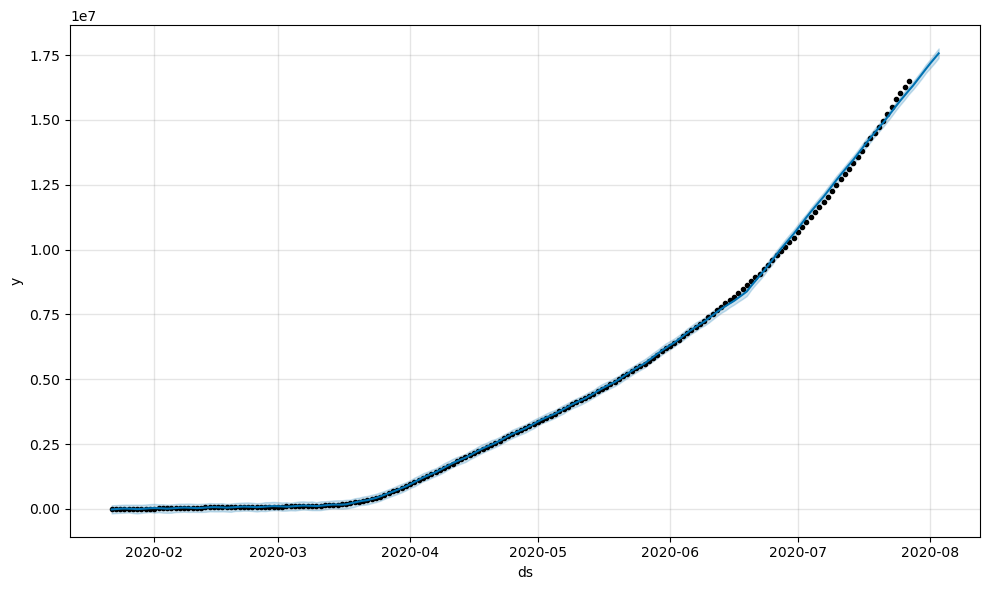

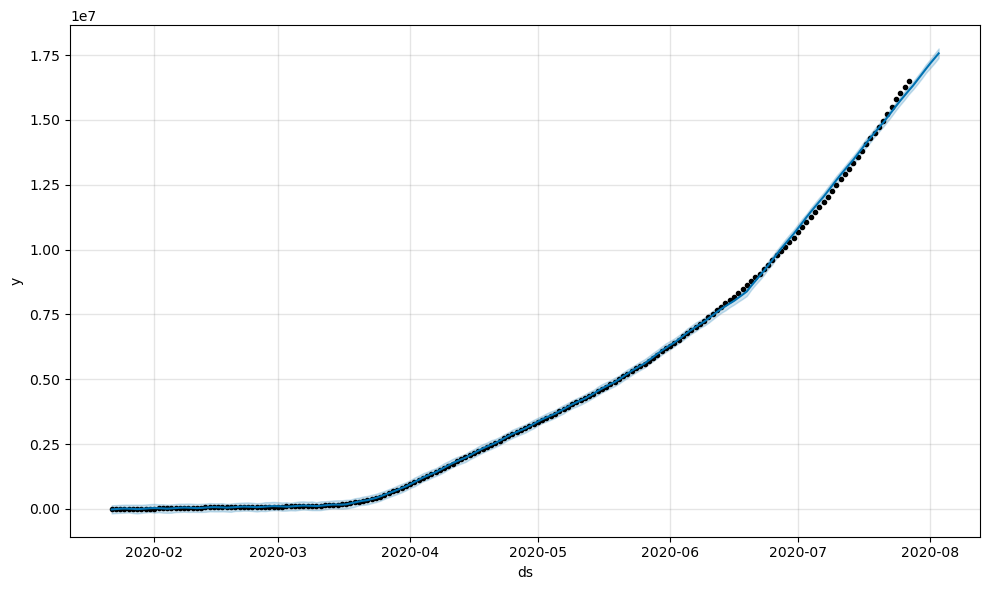

In [334]:
m.plot(forcast)

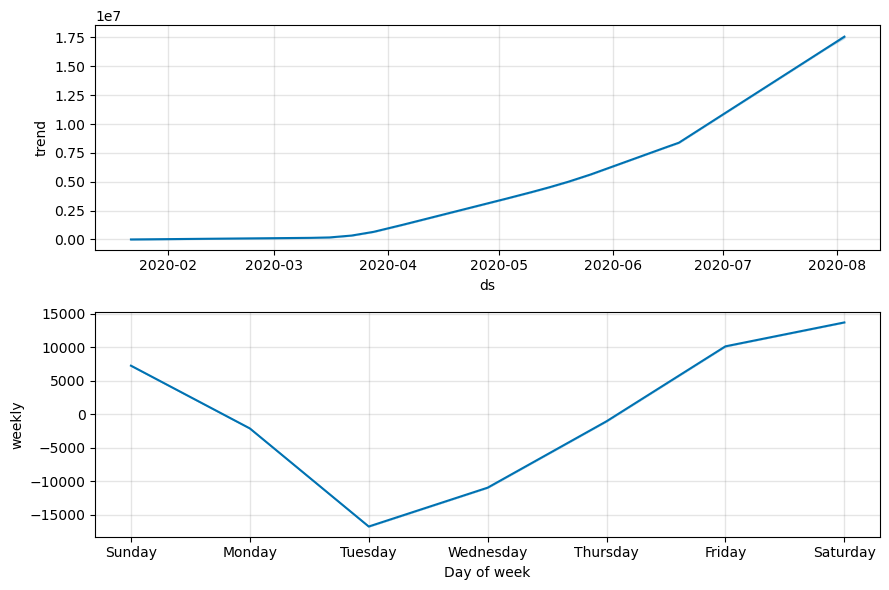

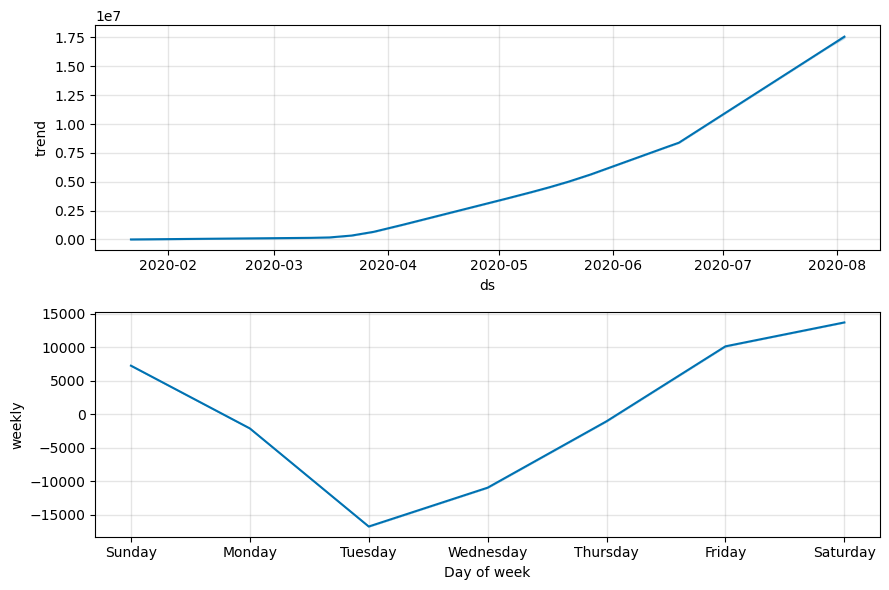

In [335]:
m.plot_components(forcast)

In case of confirmed cases, it can be seen that the cases trend has been moving exponentially for the next 7 days. 

In [ ]:
#forecast for active cases

In [341]:
active_data= df.groupby('Date')['Active'].sum().reset_index()
active_data.columns= ['ds', 'y']
active_data 

ds        y
0   2020-01-22      510
1   2020-01-23      606
2   2020-01-24      879
3   2020-01-25     1353
4   2020-01-26     2010
..         ...      ...
183 2020-07-23  6166006
184 2020-07-24  6212290
185 2020-07-25  6243930
186 2020-07-26  6309711
187 2020-07-27  6358362

[188 rows x 2 columns]

In [339]:
a=Prophet()

In [342]:
a.fit(active_data)

01:50:59 - cmdstanpy - INFO - Chain [1] start processing
01:50:59 - cmdstanpy - INFO - Chain [1] done processing


In [345]:
future1=a.make_future_dataframe(periods=7, freq= 'D')

In [346]:
forecast1= a.predict(future1)

In [347]:
forecast1

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22  3.938643e+02 -5.171620e+04  3.880309e+04  3.938643e+02   
1   2020-01-23  2.179133e+03 -4.676901e+04  4.653576e+04  2.179133e+03   
2   2020-01-24  3.964401e+03 -3.503853e+04  5.053264e+04  3.964401e+03   
3   2020-01-25  5.749669e+03 -3.562605e+04  5.561723e+04  5.749669e+03   
4   2020-01-26  7.534937e+03 -3.246380e+04  6.256090e+04  7.534937e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  6.483573e+06  6.438902e+06  6.528759e+06  6.480801e+06   
191 2020-07-31  6.545825e+06  6.502102e+06  6.598915e+06  6.540364e+06   
192 2020-08-01  6.608078e+06  6.565500e+06  6.661048e+06  6.599725e+06   
193 2020-08-02  6.670331e+06  6.629855e+06  6.730155e+06  6.658373e+06   
194 2020-08-03  6.732584e+06  6.678953e+06  6.785763e+06  6.716179e+06   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3.938643e+02    -5768.245001          -5768.245001          -5768.245001   
1    2.179133e+03    -2565.777101          -2565.777101          -2565.777101   
2    3.964401e+03     3219.382782           3219.382782           3219.382782   
3    5.749669e+03     3129.564761           3129.564761           3129.564761   
4    7.534937e+03     8182.557400           8182.557400           8182.557400   
..            ...             ...                   ...                   ...   
190  6.485625e+06    -2565.777101          -2565.777101          -2565.777101   
191  6.550215e+06     3219.382782           3219.382782           3219.382782   
192  6.615554e+06     3129.564761           3129.564761           3129.564761   
193  6.682106e+06     8182.557400           8182.557400           8182.557400   
194  6.749042e+06     -334.830669           -334.830669           -334.830669   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -5768.245001  -5768.245001  -5768.245001                   0.0   
1   -2565.777101  -2565.777101  -2565.777101                   0.0   
2    3219.382782   3219.382782   3219.382782                   0.0   
3    3129.564761   3129.564761   3129.564761                   0.0   
4    8182.557400   8182.557400   8182.557400                   0.0   
..           ...           ...           ...                   ...   
190 -2565.777101  -2565.777101  -2565.777101                   0.0   
191  3219.382782   3219.382782   3219.382782                   0.0   
192  3129.564761   3129.564761   3129.564761                   0.0   
193  8182.557400   8182.557400   8182.557400                   0.0   
194  -334.830669   -334.830669   -334.830669                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -5.374381e+03  
1                           0.0                         0.0 -3.866446e+02  
2                           0.0                         0.0  7.183784e+03  
3                           0.0                         0.0  8.879234e+03  
4                           0.0                         0.0  1.571749e+04  
..                          ...                         ...           ...  
190                         0.0                         0.0  6.481007e+06  
191                         0.0                         0.0  6.549045e+06  
192                         0.0                         0.0  6.611208e+06  
193                         0.0                         0.0  6.678514e+06  
194                         0.0                         0.0  6.732249e+06  

[195 rows x 16 columns]

In [348]:
forecast1[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

ds          yhat    yhat_upper    yhat_lower
0   2020-01-22 -5.374381e+03  3.880309e+04 -5.171620e+04
1   2020-01-23 -3.866446e+02  4.653576e+04 -4.676901e+04
2   2020-01-24  7.183784e+03  5.053264e+04 -3.503853e+04
3   2020-01-25  8.879234e+03  5.561723e+04 -3.562605e+04
4   2020-01-26  1.571749e+04  6.256090e+04 -3.246380e+04
..         ...           ...           ...           ...
190 2020-07-30  6.481007e+06  6.528759e+06  6.438902e+06
191 2020-07-31  6.549045e+06  6.598915e+06  6.502102e+06
192 2020-08-01  6.611208e+06  6.661048e+06  6.565500e+06
193 2020-08-02  6.678514e+06  6.730155e+06  6.629855e+06
194 2020-08-03  6.732249e+06  6.785763e+06  6.678953e+06

[195 rows x 4 columns]

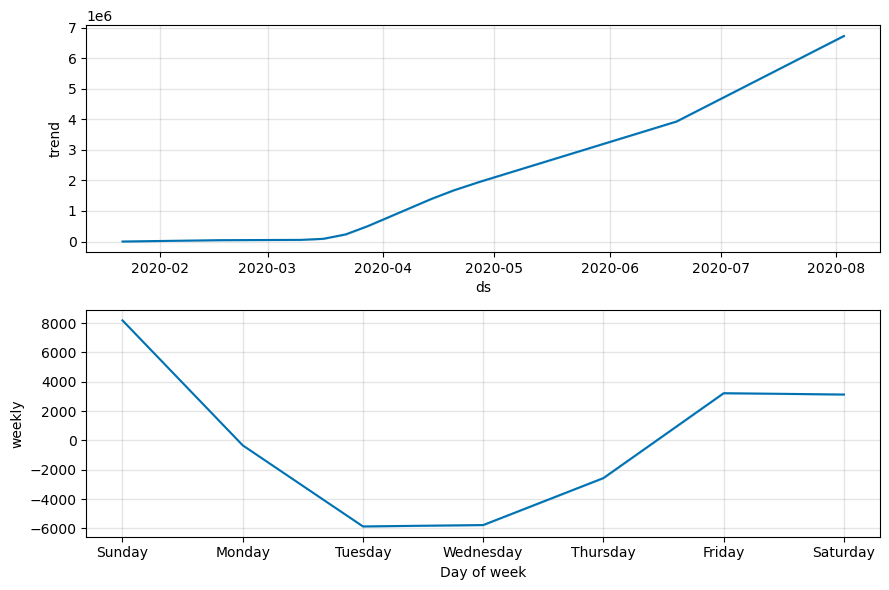

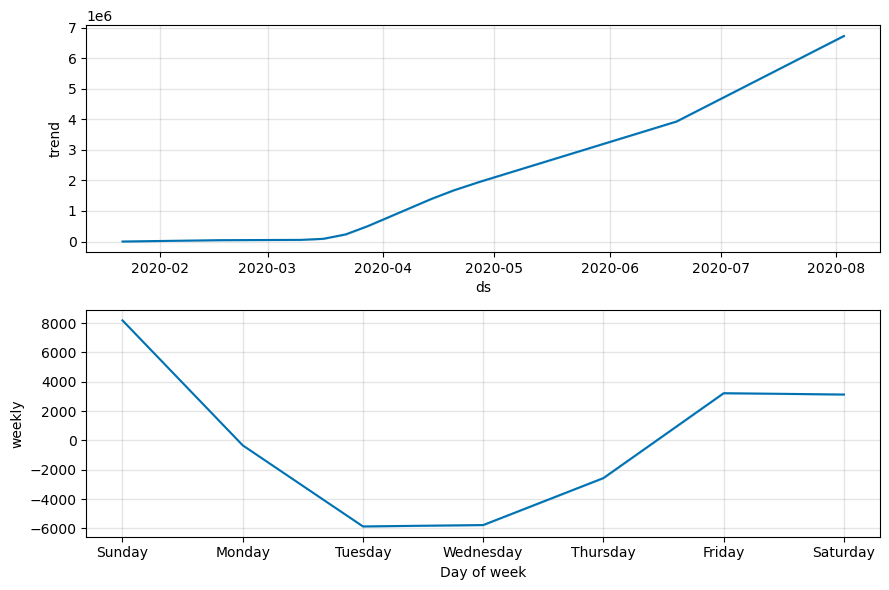

In [349]:
a.plot_components(forecast1)

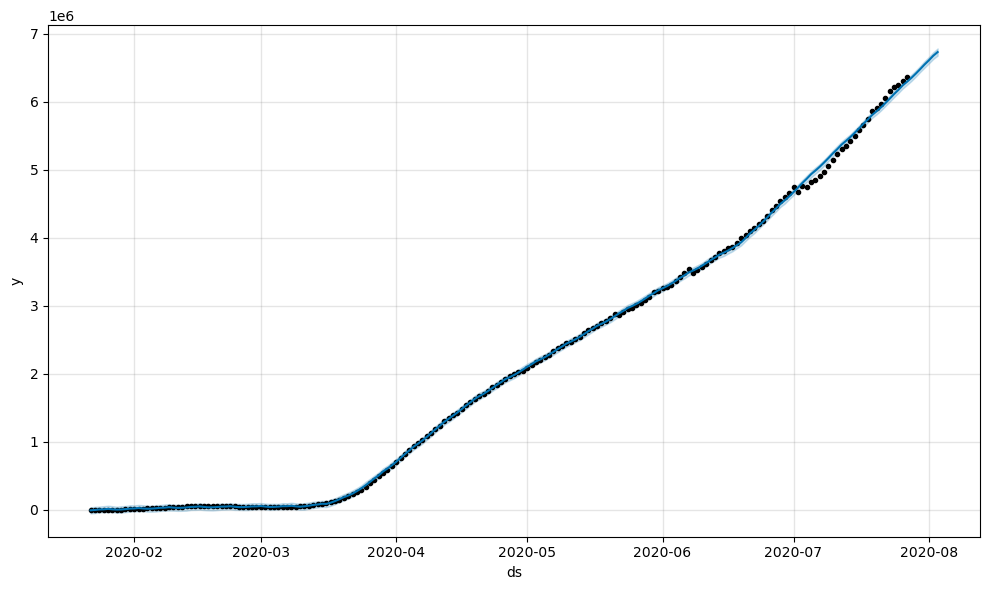

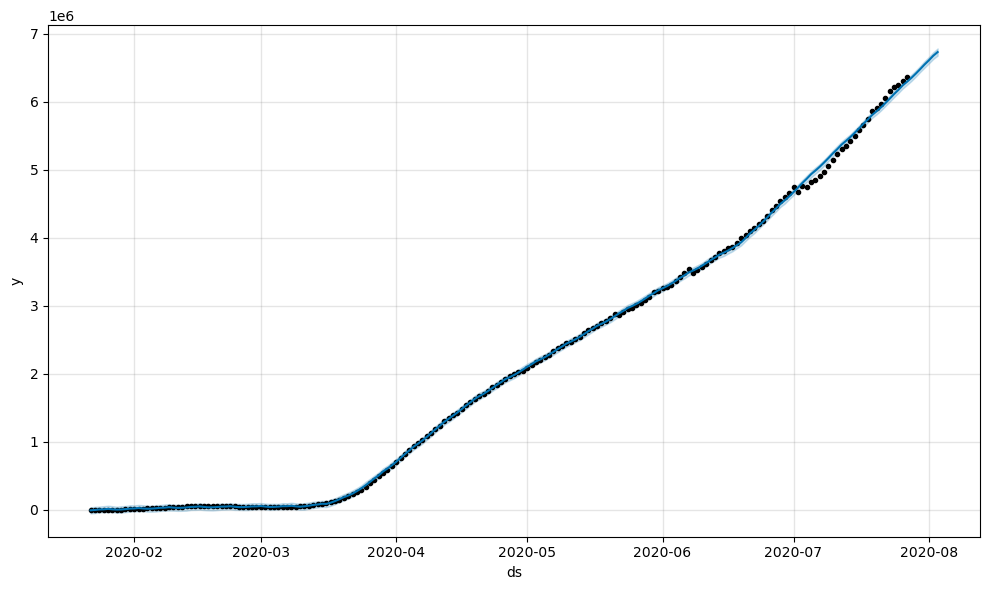

In [350]:
a.plot(forecast1)

In case of active cases, it can be seen that the cases trend has been moving exponentially for the next 7 days. 

In [ ]:
#making forecast for recovered data

In [351]:
Recovered_data= df.groupby('Date')['Recovered'].sum().reset_index()
Recovered_data.columns= ['ds', 'y']
Recovered_data 

ds        y
0   2020-01-22       28
1   2020-01-23       30
2   2020-01-24       36
3   2020-01-25       39
4   2020-01-26       52
..         ...      ...
183 2020-07-23  8710969
184 2020-07-24  8939705
185 2020-07-25  9158743
186 2020-07-26  9293464
187 2020-07-27  9468087

[188 rows x 2 columns]

In [352]:
r=Prophet()

In [353]:
r.fit(Recovered_data)

01:55:47 - cmdstanpy - INFO - Chain [1] start processing
01:55:47 - cmdstanpy - INFO - Chain [1] done processing


In [355]:
future2 =r.make_future_dataframe(periods = 7, freq= 'D')

In [359]:
forecast= r.predict(future2)
forecast

ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2020-01-22 -1.205742e+04 -1.005598e+05  6.384809e+04 -1.205742e+04   
1   2020-01-23 -1.098608e+04 -9.643564e+04  6.745181e+04 -1.098608e+04   
2   2020-01-24 -9.914746e+03 -7.947286e+04  7.580926e+04 -9.914746e+03   
3   2020-01-25 -8.843409e+03 -7.521197e+04  7.755834e+04 -8.843409e+03   
4   2020-01-26 -7.772072e+03 -8.828592e+04  6.969652e+04 -7.772072e+03   
..         ...           ...           ...           ...           ...   
190 2020-07-30  9.597263e+06  9.523587e+06  9.675358e+06  9.593056e+06   
191 2020-07-31  9.733968e+06  9.661339e+06  9.820467e+06  9.726202e+06   
192 2020-08-01  9.870673e+06  9.802175e+06  9.964069e+06  9.857969e+06   
193 2020-08-02  1.000738e+07  9.917968e+06  1.008577e+07  9.987845e+06   
194 2020-08-03  1.014408e+07  1.006083e+07  1.023108e+07  1.011789e+07   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   -1.205742e+04    -4840.302869          -4840.302869          -4840.302869   
1   -1.098608e+04     1268.505419           1268.505419           1268.505419   
2   -9.914746e+03     6127.046185           6127.046185           6127.046185   
3   -8.843409e+03     9721.186032           9721.186032           9721.186032   
4   -7.772072e+03     -915.440191           -915.440191           -915.440191   
..            ...             ...                   ...                   ...   
190  9.601985e+06     1268.505419           1268.505419           1268.505419   
191  9.743165e+06     6127.046185           6127.046185           6127.046185   
192  9.885787e+06     9721.186032           9721.186032           9721.186032   
193  1.003006e+07     -915.440191           -915.440191           -915.440191   
194  1.017568e+07    -1036.123578          -1036.123578          -1036.123578   

          weekly  weekly_lower  weekly_upper  multiplicative_terms  \
0   -4840.302869  -4840.302869  -4840.302869                   0.0   
1    1268.505419   1268.505419   1268.505419                   0.0   
2    6127.046185   6127.046185   6127.046185                   0.0   
3    9721.186032   9721.186032   9721.186032                   0.0   
4    -915.440191   -915.440191   -915.440191                   0.0   
..           ...           ...           ...                   ...   
190  1268.505419   1268.505419   1268.505419                   0.0   
191  6127.046185   6127.046185   6127.046185                   0.0   
192  9721.186032   9721.186032   9721.186032                   0.0   
193  -915.440191   -915.440191   -915.440191                   0.0   
194 -1036.123578  -1036.123578  -1036.123578                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper          yhat  
0                           0.0                         0.0 -1.689772e+04  
1                           0.0                         0.0 -9.717577e+03  
2                           0.0                         0.0 -3.787700e+03  
3                           0.0                         0.0  8.777771e+02  
4                           0.0                         0.0 -8.687512e+03  
..                          ...                         ...           ...  
190                         0.0                         0.0  9.598531e+06  
191                         0.0                         0.0  9.740095e+06  
192                         0.0                         0.0  9.880394e+06  
193                         0.0                         0.0  1.000646e+07  
194                         0.0                         0.0  1.014305e+07  

[195 rows x 16 columns]

In [360]:
forecast[['ds', 'yhat', 'yhat_upper', 'yhat_lower']]

ds          yhat    yhat_upper    yhat_lower
0   2020-01-22 -1.689772e+04  6.384809e+04 -1.005598e+05
1   2020-01-23 -9.717577e+03  6.745181e+04 -9.643564e+04
2   2020-01-24 -3.787700e+03  7.580926e+04 -7.947286e+04
3   2020-01-25  8.777771e+02  7.755834e+04 -7.521197e+04
4   2020-01-26 -8.687512e+03  6.969652e+04 -8.828592e+04
..         ...           ...           ...           ...
190 2020-07-30  9.598531e+06  9.675358e+06  9.523587e+06
191 2020-07-31  9.740095e+06  9.820467e+06  9.661339e+06
192 2020-08-01  9.880394e+06  9.964069e+06  9.802175e+06
193 2020-08-02  1.000646e+07  1.008577e+07  9.917968e+06
194 2020-08-03  1.014305e+07  1.023108e+07  1.006083e+07

[195 rows x 4 columns]

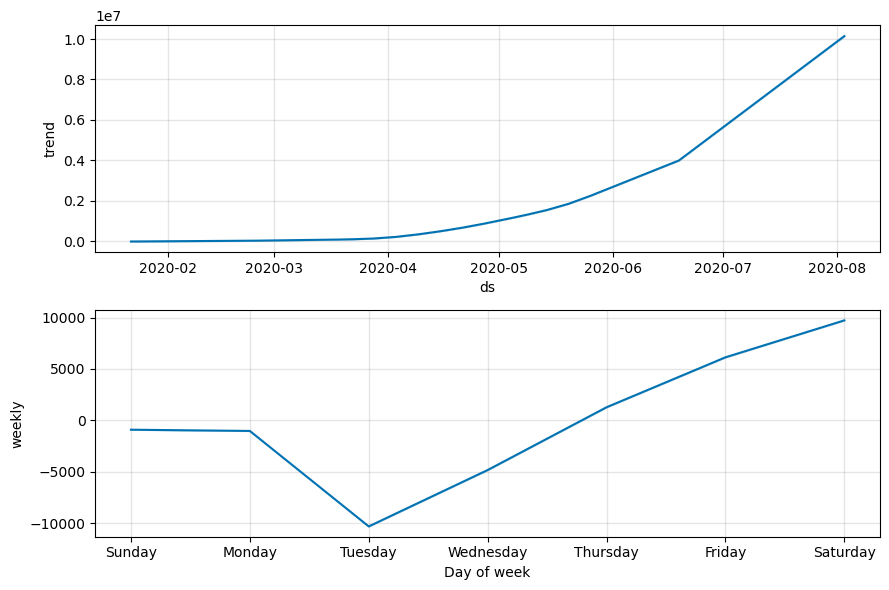

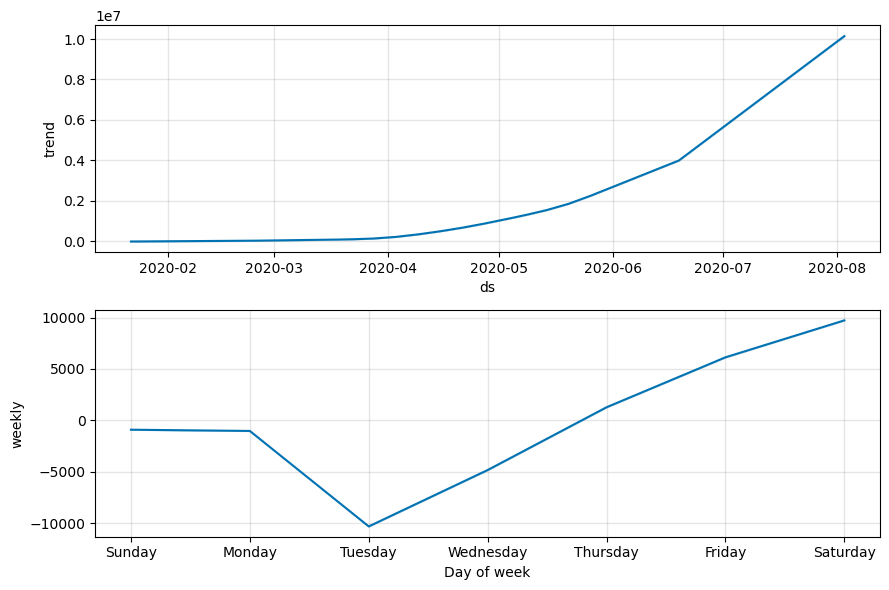

In [361]:
r.plot_components(forecast)

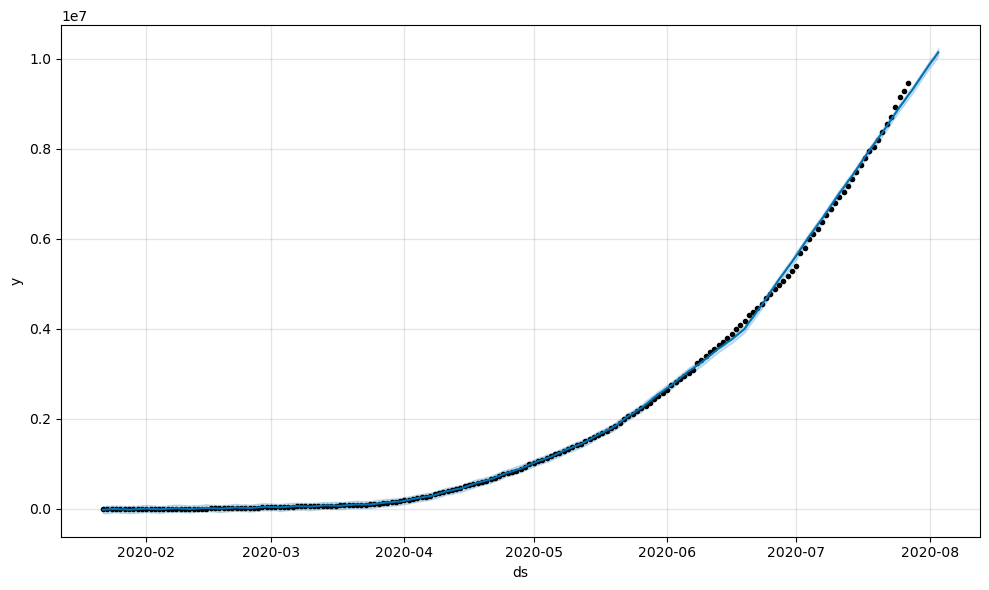

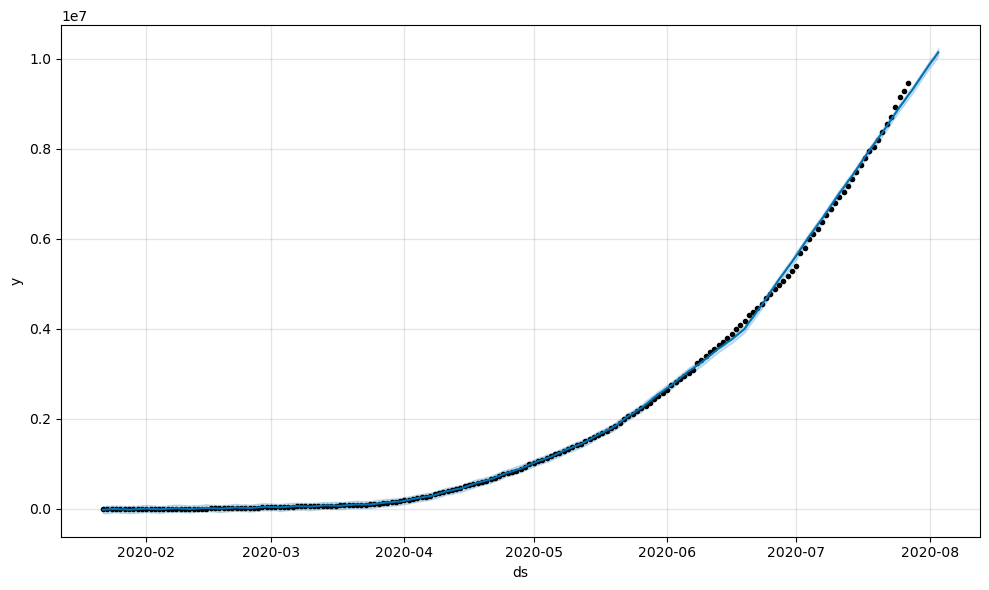

In [362]:
r.plot(forecast)

In case of recovered cases, it can be seen that the cases trend has been moving exponentially for the next 7 days. 

Final thoughts:

All prediction and forecasting for the covid-19 data across different countries have been showing similar patterns 
and trends in the visualisation. 
